<a href="https://colab.research.google.com/github/MaschinenNah/MachineLearningKursCdV/blob/main/05_01_CIFAR10_Dense.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bildinhalte erkennen**
Frosch oder Hund, Automobil oder Lastkraftwagen?

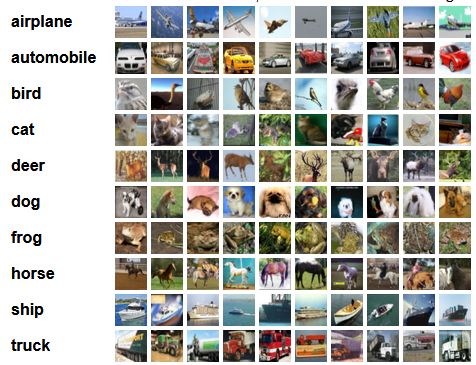

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

####**Trainingsdaten laden und formatieren**

In [ ]:
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

Im Vergleich zum MNIST Datensatz haben die x-Daten von CIFAR-10 eine Dimension mehr.

Der Grund ist, dass die Bilder nicht schwarzweiß, sondern farbig sind. Entsprechend wird jedes Pixel von drei Farbwerten (rot, grün und blau) repräsentiert, nicht von einem wie bei MNIST:

In [ ]:
# nicht funktionaler Code, dient nur der Erklärung
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


Die Bildkennungen (ob Flugzeug, Katze etc...) sind als ganze Zahlen codiert. Die Liste `IMAGE_CLASSES` dient an verschiedenen Stellen des Programms der Übersetzung.

In [ ]:
y_train_old = y_train

NUM_CLASSES = 10
IMAGE_CLASSES = ["Flugzeug", "Automobil", "Vogel", "Katze", "Wild", "Hund", "Frosch", "Pferd", "Schiff", "Lastkraftwagen"]

x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

In [ ]:
from keras.utils import to_categorical

y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)

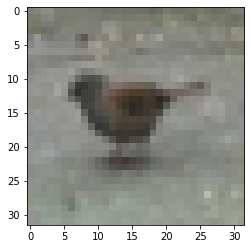

Vogel


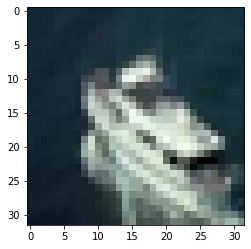

Schiff


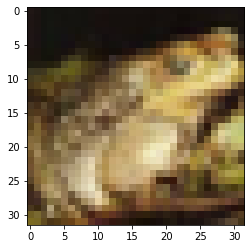

Frosch


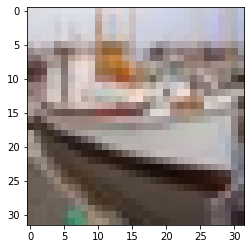

Schiff


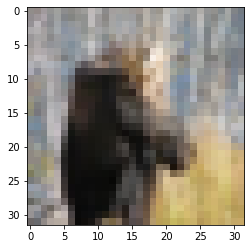

Wild


In [ ]:
import random

for _ in range(5):
  selection = random.randint(0, 50000)
  plt.imshow(x_train[selection])
  plt.show()
  image_class = IMAGE_CLASSES[y_train_old[selection][0]]
                            
  print(image_class)

####**Model konstruieren**

Beim Modell gibt es lediglich einen Unterschied im Vergleich zu der Zeichenerkennung: Die Form der Eingangsschicht hat (genau wie die x-Daten!) eine Dimension mehr für die Farbkanäle.

In [ ]:
from keras.layers import Input, Flatten, Dense, Softmax
from keras.models import Model


input_layer = Input(shape=(32,32,3))

x = Flatten()(input_layer)

x = Dense(units=500, activation='sigmoid')(x)

x = Dense(units=100, activation='sigmoid')(x)

output_layer = Dense(units=NUM_CLASSES, activation = 'softmax')(x)

model = Model(input_layer, output_layer)

In [ ]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 500)               1536500   
_________________________________________________________________
dense_1 (Dense)              (None, 100)               50100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 1,587,610
Trainable params: 1,587,610
Non-trainable params: 0
_________________________________________________________________


####**Optimierungsfunktion definieren und Modell kompilieren**

In [ ]:
from keras.optimizers import Adam

opt = Adam(lr=0.0005)

model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

####**Training starten**

In [ ]:
history = model.fit(x_train, 
          y_train,
          batch_size=32,
          epochs=10,
          shuffle=True,
          validation_data = (x_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 23s 15ms/step - loss: 1.8513 - accuracy: 0.3364 - val_loss: 1.7052 - val_accuracy: 0.4020
Epoch 2/10
1563/1563 [==============================] - 19s 12ms/step - loss: 1.6638 - accuracy: 0.4056 - val_loss: 1.6821 - val_accuracy: 0.4093
Epoch 3/10
1563/1563 [==============================] - 19s 12ms/step - loss: 1.5907 - accuracy: 0.4338 - val_loss: 1.5803 - val_accuracy: 0.4396
Epoch 4/10
1563/1563 [==============================] - 19s 12ms/step - loss: 1.5419 - accuracy: 0.4518 - val_loss: 1.5133 - val_accuracy: 0.4617
Epoch 5/10
1563/1563 [==============================] - 19s 12ms/step - loss: 1.5022 - accuracy: 0.4625 - val_loss: 1.5074 - val_accuracy: 0.4622
Epoch 6/10
1563/1563 [==============================] - 19s 12ms/step - loss: 1.4704 - accuracy: 0.4750 - val_loss: 1.5682 - val_accuracy: 0.4408
Epoch 7/10
1563/1563 [==============================] - 19s 12ms/step - loss: 1.4453 - accuracy: 0.4824 - val_loss: 1.4786 -

Wir merken es schon während des Trainings, und die Grafik zeigt es noch deutlicher: Mit diesem Modell kommen wir niemals auch nur in die Nähe einer Genauigkeit von 98 %.

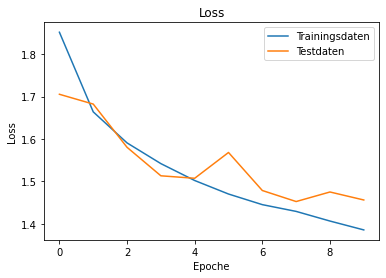

In [ ]:
plt.title('Loss')
plt.plot(history.history['loss'], label='Trainingsdaten')
plt.plot(history.history['val_loss'], label='Testdaten')
plt.xlabel("Epoche")
plt.ylabel("Loss")
plt.legend()

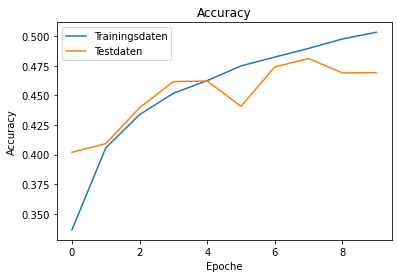

In [ ]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='Trainingsdaten')
plt.plot(history.history['val_accuracy'], label='Testdaten')
plt.xlabel("Epoche")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#### **Das Modell bewerten**

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 1.4563 - accuracy: 0.4693


[1.4563089609146118, 0.4693000018596649]

####**Das Modell in Aktion**



Immerhin besser als Raten - bei etwa der Hälfte der Fälle liegt unser Modell richtig:

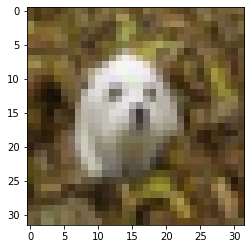

Hund


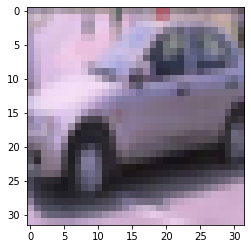

Lastkraftwagen


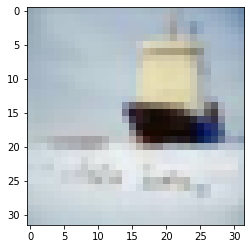

Flugzeug


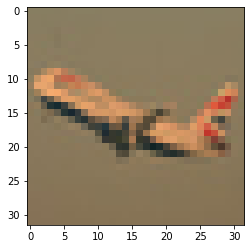

Wild


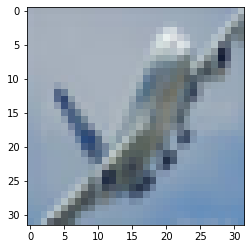

Schiff


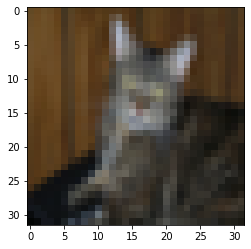

Katze


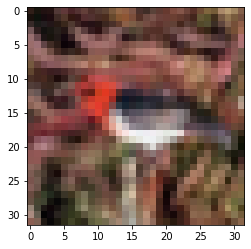

Hund


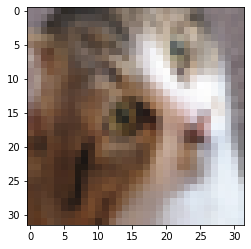

Katze


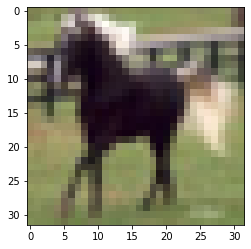

Pferd


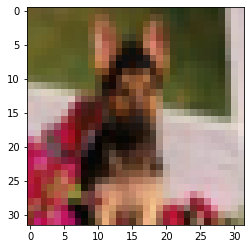

Pferd


In [ ]:
N_EXAMPLES = 10

indices = np.random.choice(range(10000), N_EXAMPLES)
arrays = x_test[indices]

predictions = model.predict(arrays)

for idx, array in enumerate(arrays):
  plt.imshow(array)
  plt.show()
  image_class = np.argmax(predictions[idx], axis = -1)
  image_class = IMAGE_CLASSES[image_class]
  print(image_class)


In [ ]:
print(sum(predictions[0]))